In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
% matplotlib inline

In [3]:
df = pd.read_csv('C:/Users/harsh/Bitcoin/Bitcoin.csv', sep ='\t')

In [4]:
df.head()

,close,date,high,low,open,quoteVolume,volume,weightedAverage
0,225.0,1424368800,225.0,225.0,225.0,0.004444,0.999999,225.000000
1,244.0,1424376000,244.0,225.0,225.0,0.188671,45.275877,239.972316
2,244.0,1424383200,244.0,244.0,244.0,0.000002,0.000437,244.000000
3,244.0,1424390400,244.0,244.0,244.0,0.000000,0.000000,244.000000
4,244.0,1424397600,244.0,244.0,244.0,0.000000,0.000000,244.000000


In [5]:
df.date = pd.to_datetime(df.date , unit ='s').dt.date


In [6]:
df.head()

,close,date,high,low,open,quoteVolume,volume,weightedAverage
0,225.0,2015-02-19,225.0,225.0,225.0,0.004444,0.999999,225.000000
1,244.0,2015-02-19,244.0,225.0,225.0,0.188671,45.275877,239.972316
2,244.0,2015-02-19,244.0,244.0,244.0,0.000002,0.000437,244.000000
3,244.0,2015-02-20,244.0,244.0,244.0,0.000000,0.000000,244.000000
4,244.0,2015-02-20,244.0,244.0,244.0,0.000000,0.000000,244.000000


In [7]:
dateData = df.groupby('date')
bitcoinprice = dateData['weightedAverage'].mean()
bitcoinprice

date
2015-02-19      236.324105
2015-02-20      241.569796
2015-02-21      241.437500
2015-02-22      243.388902
2015-02-23      235.000028
2015-02-24      236.645849
2015-02-25      238.678477
2015-02-26      238.237145
2015-02-27      243.989568
2015-02-28      240.862461
2015-03-01      247.333363
2015-03-02      253.314502
2015-03-03      266.615478
2015-03-04      267.481888
2015-03-05      269.582689
2015-03-06      267.340422
2015-03-07      260.000005
2015-03-08      262.073816
2015-03-09      266.624219
2015-03-10      278.659841
2015-03-11      284.177607
2015-03-12      276.015527
2015-03-13      295.400651
2015-03-14      275.104856
2015-03-15      277.223667
2015-03-16      279.931787
2015-03-17      275.000000
2015-03-18      275.035339
2015-03-19      259.265596
2015-03-20      262.772903
                  ...     
2017-11-15     6997.991248
2017-11-16     7457.755716
2017-11-17     7815.083058
2017-11-18     7683.254751
2017-11-19     7842.023700
2017-11-20     8125.694

In [8]:
#lets use LSTM to predict for a 2 weeks
prediction_week_days = 14
train = bitcoinprice[:len(bitcoinprice) - 14]
test = bitcoinprice[len(bitcoinprice) - 14 :]

In [9]:
train.head()
test.head()

date
2017-12-01    10129.599181
2017-12-02    10920.999775
2017-12-03    11266.686638
2017-12-04    11318.435050
2017-12-05    11655.798360
Name: weightedAverage, dtype: float64

In [10]:
trainingData = np.reshape(train.values , (len(train.values),1))


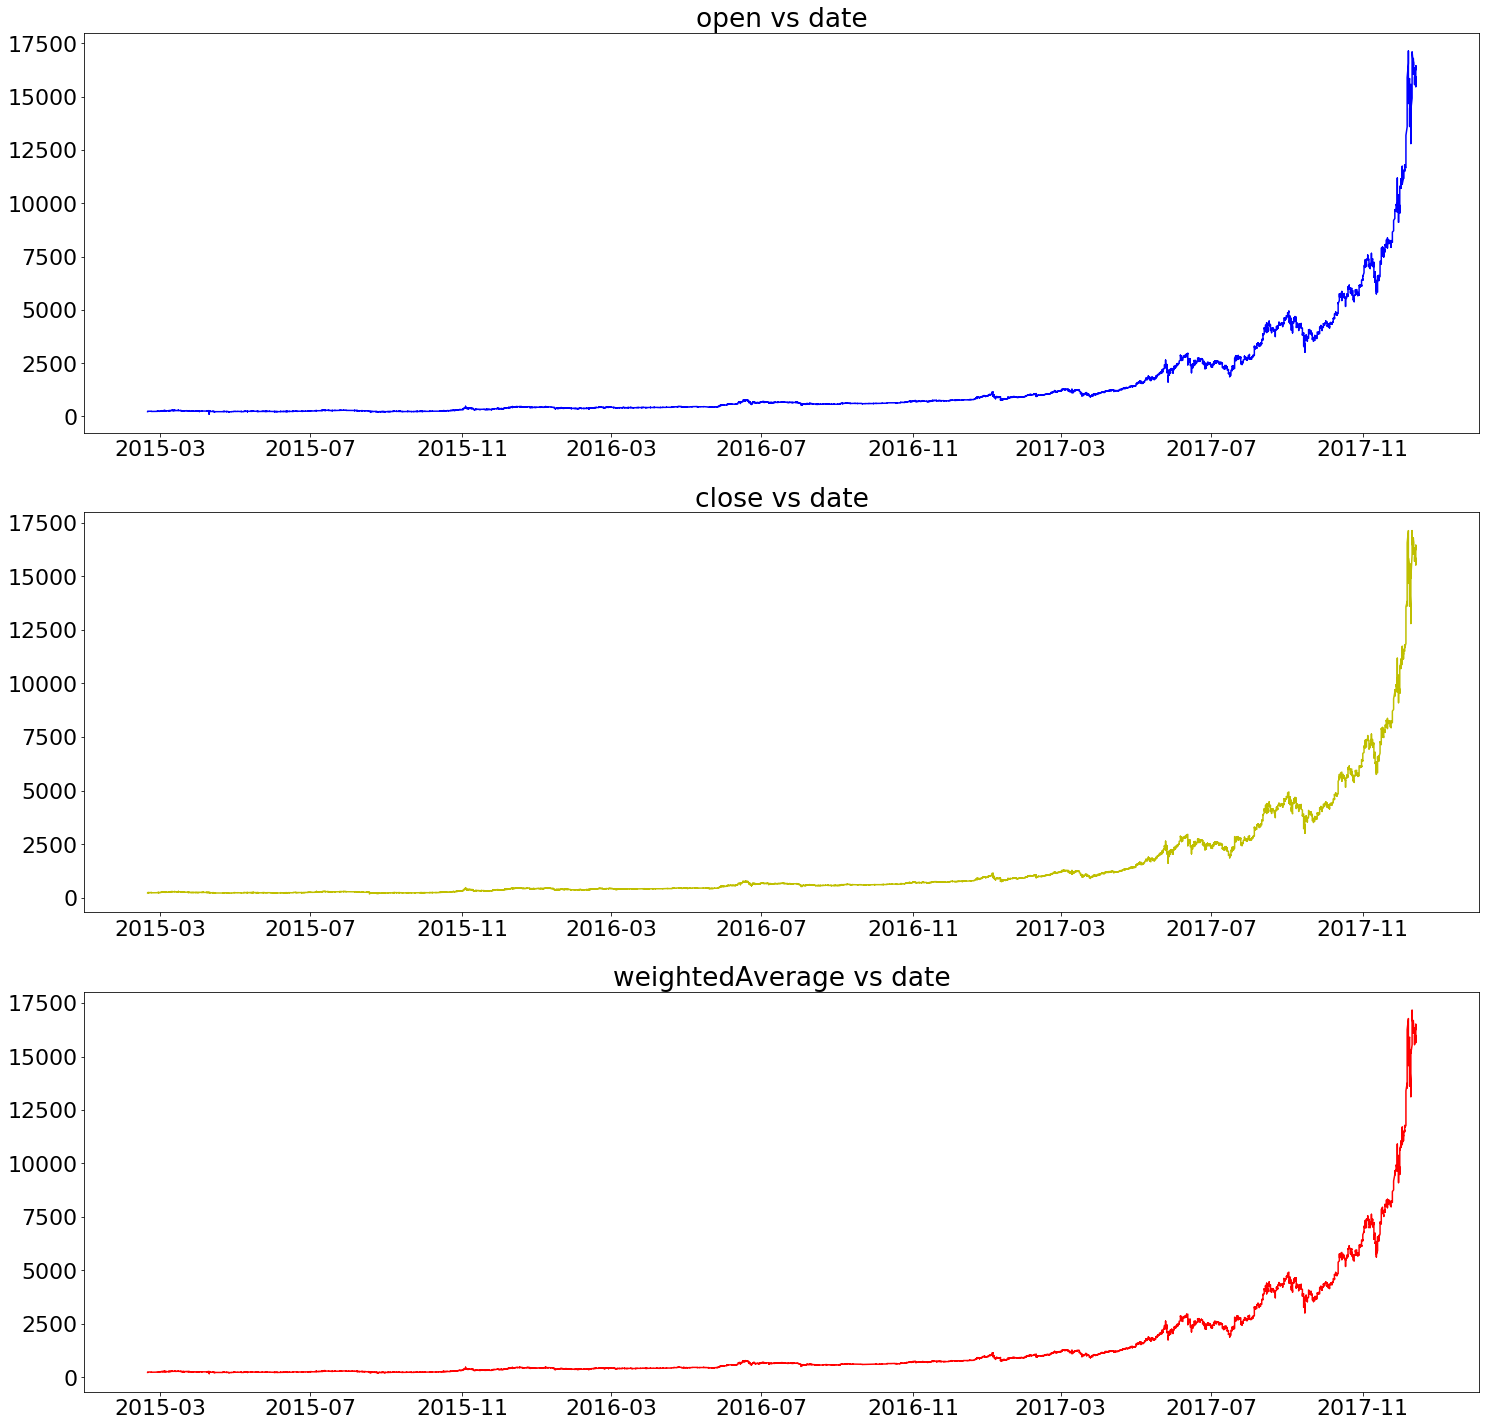

In [11]:
plt.rcParams.update({'font.size': 22})
df.index = df['date']
plt.figure(figsize=(25,25))
plt.subplot( 3 , 1 , 1)
plt.plot(df['open'] , 'b-')
plt.title("open vs date")
plt.subplot( 3 , 1 , 2)
plt.plot(df['close'] ,'y-')
plt.title("close vs date")
plt.subplot( 3 , 1 , 3)
plt.plot(df['weightedAverage'] ,'r-')


plt.title("weightedAverage vs date")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12348 entries, 2015-02-19 to 2017-12-14
Data columns (total 8 columns):
close              12348 non-null float64
date               12348 non-null object
high               12348 non-null float64
low                12348 non-null float64
open               12348 non-null float64
quoteVolume        12348 non-null float64
volume             12348 non-null float64
weightedAverage    12348 non-null float64
dtypes: float64(7), object(1)
memory usage: 868.2+ KB


In [13]:
import keras

Using TensorFlow backend.


In [14]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense

In [15]:
import keras.backend as K
K.clear_session()

In [16]:
test


date
2017-12-01    10129.599181
2017-12-02    10920.999775
2017-12-03    11266.686638
2017-12-04    11318.435050
2017-12-05    11655.798360
2017-12-06    12530.558513
2017-12-07    14648.239627
2017-12-08    15350.621234
2017-12-09    14774.216876
2017-12-10    14197.462982
2017-12-11    16368.966920
2017-12-12    16407.683698
2017-12-13    16040.430865
2017-12-14    16067.503900
Name: weightedAverage, dtype: float64

In [17]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
trainingData = sc.fit_transform(trainingData)

Xtrain = trainingData[0:len(trainingData)-1]
Ytrain = trainingData[1:len(trainingData)]
X = np.reshape(Xtrain , (len(Xtrain),1,1))

#X = np.reshape( X ,( X.shape[0] , X.shape[1] , 1))
#Y = np.reshape(Y , (Y.shape[0], Y.shape[1],1))

In [18]:
from keras.optimizers import SGD
from keras.layers import LSTM

model = Sequential()


model.add(LSTM(20,input_shape=(None , 1)))
model.add(Dropout(1e-7))
model.add(Dense(1, activation = 'linear'))


opt = SGD(lr=0.01)
#model.compile(loss = "categorical_crossentropy", optimizer = opt
model.compile(optimizer='adam',loss='mse')

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                1760      
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 1,781
Trainable params: 1,781
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X, Ytrain, epochs=50, batch_size=5)

Epoch 1/50
1015/1015 [==============================] - 2s 2ms/step - loss: 0.0203

In [21]:
Xtest = np.reshape(test.values , (len(test.values),1))
Xtest = sc.transform(Xtest)
Xtest = np.reshape(Xtest,(len(Xtest),1,1))

In [22]:
predictedvalues = model.predict(Xtest)
predictedvalues = sc.inverse_transform(predictedvalues)

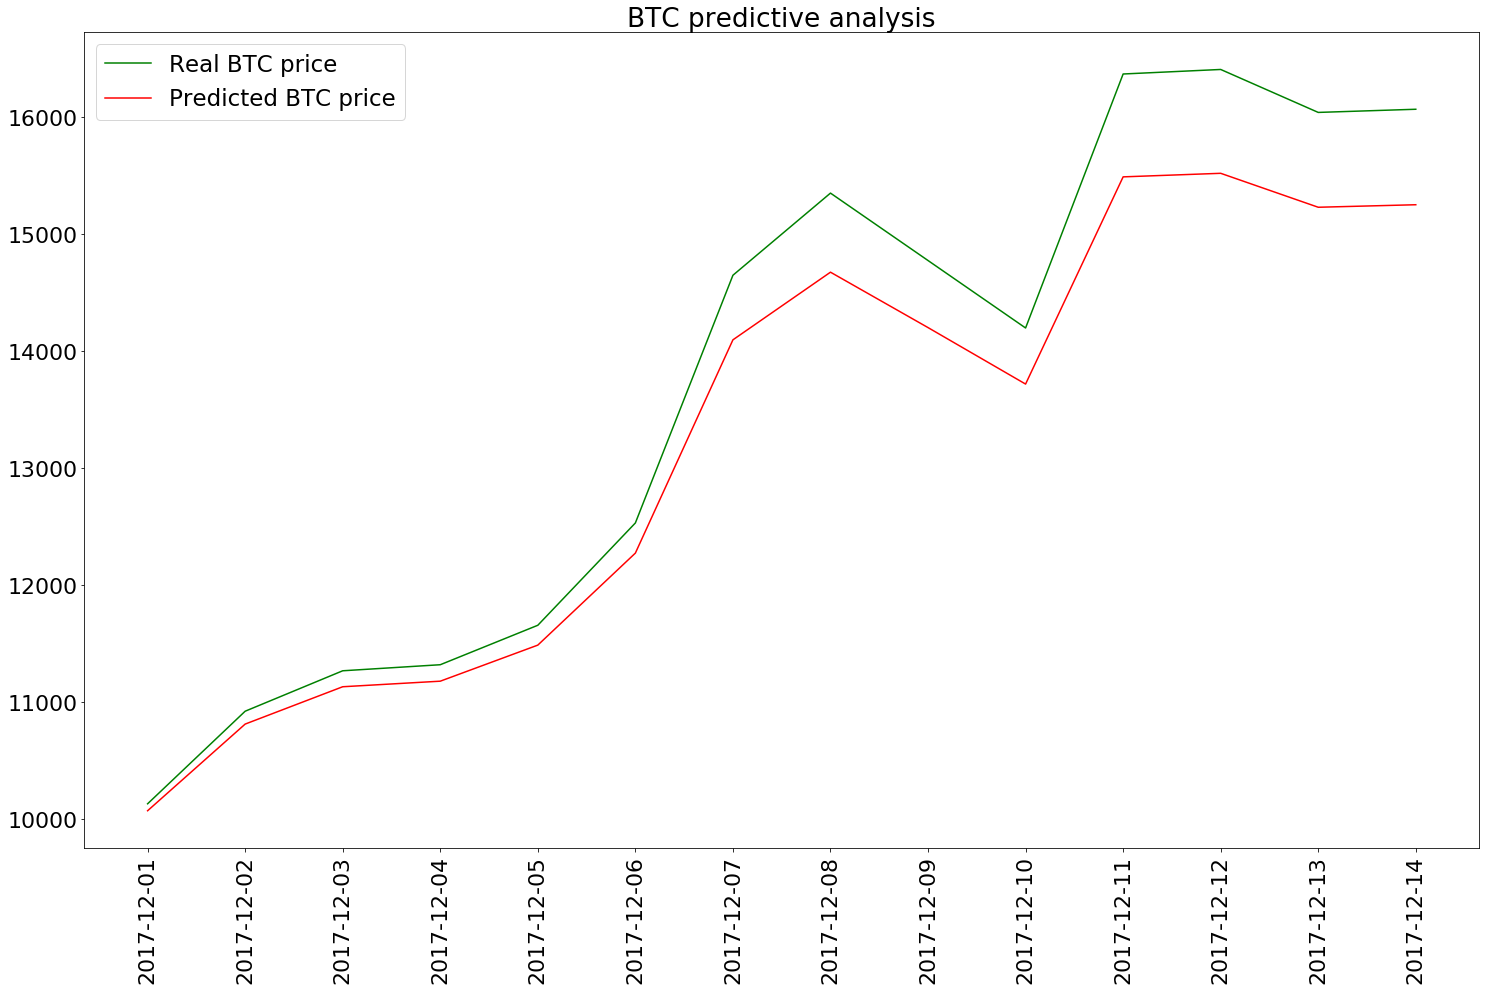

In [23]:
plt.figure(figsize=(25,15))
plt.plot(test.values , color ='green' , label="Real BTC price")
plt.plot(predictedvalues , color ='red' , label="Predicted BTC price")
df_test = test.reset_index()
x=df_test.index
labels = df_test['date']
plt.xticks(x, labels, rotation = 'vertical')
plt.legend(loc=2, prop={'size': 23})
plt.title("BTC predictive analysis")